### 군집화(Clustering) : K Means 알고리즘

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- iris 데이터 군집화 - pca로 차원축소를 한 후 그림으로 나타내기

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

- K-Means 모델 생성 및 학습

In [7]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [10]:
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(iris_std) #비지도학습이므로 y값은 제공하지 않는다

KMeans(n_clusters=3, random_state=2022)

In [11]:
#학습결과
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
np.unique(kmeans.labels_, return_counts=True)
#1은 setosa, versicolor와 virginica는 섞여있는 상태?(iris 차원축소 부분 참고)

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

In [14]:
df = pd.DataFrame({
    'PC1':iris_pca[:,0], 'PC2':iris_pca[:,1], 'target':iris.target, 'cluster':kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0
54,1.075475,-0.208421,1,0


In [17]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         39
       2         11
2      0         14
       2         36

- 군집결과 시각화

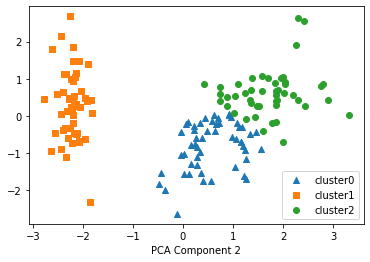

In [20]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_data = df[df.cluster == i]['PC1']
  y_data = df[df.cluster == i]['PC2']
  plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

plt.legend()
plt.xlabel('PCA Component 1'), plt.xlabel('PCA Component 2')
plt.show()

- 원본 데이터와 군집화된 데이터 비교

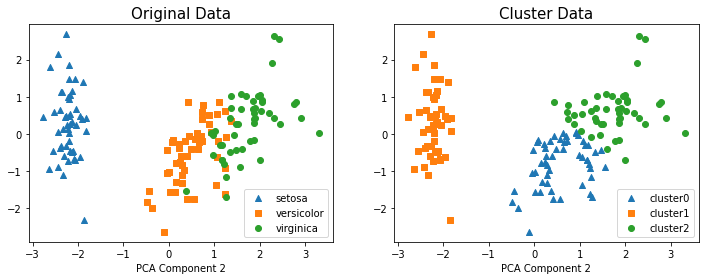

In [22]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
  plt.subplot(1,2,k+1)
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]['PC1']
    y_data = df[df[column] == i]['PC2']
    if k==0 : #target이면
      plt.title('Original Data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
    else :
      plt.title('Cluster Data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

  plt.legend()
  plt.xlabel('PCA Component 1'), plt.xlabel('PCA Component 2')
plt.show()